In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
laptop = pd.read_csv('laptop_data.csv')
laptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
laptop.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [4]:
print((laptop['Price'] < 20000 ).sum())
print((laptop['Price'] > 10000).sum())

114
1302


In [5]:
#### laptop = laptop[(laptop['Price'] >= 20000) & (laptop['Price'] <= 150000)]

In [6]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
laptop.drop(columns=['Unnamed: 0'], inplace= True)

In [8]:
# Remove 'GB' and 'kg' from Ram and Weight to convert the columns to numerical
laptop['Ram'] = laptop['Ram'].str.replace("GB", "")
laptop['Weight'] = laptop['Weight'].str.replace("kg","")

In [9]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [10]:
laptop['Ram'] = laptop['Ram'].astype("int32") 
laptop['Weight'] = laptop['Weight'].astype("float64") 

In [11]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


In [12]:
### EDA

* ### EDA

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\3969827049.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price'])


<Axes: xlabel='Price', ylabel='Density'>

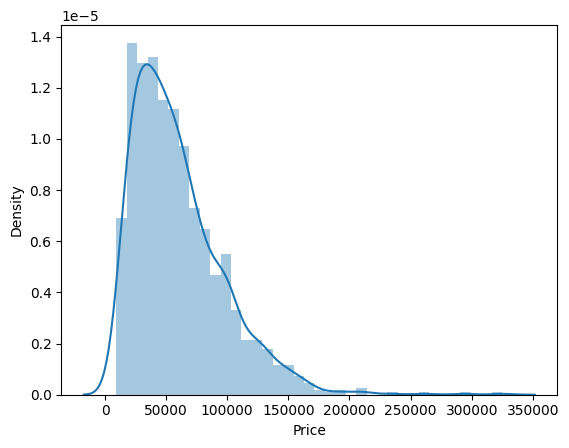

In [13]:
#sns.set_palette(sns.husl_palette(n_colors=laptop['Company'].nunique()))

#Distripution of target column
sns.distplot(laptop['Price']) 

Disribution of the target column_ Price _ is skewed, means that cheaper goods are bought and sold more than generic goods.

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\543214985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Price',data=laptop, palette='husl')


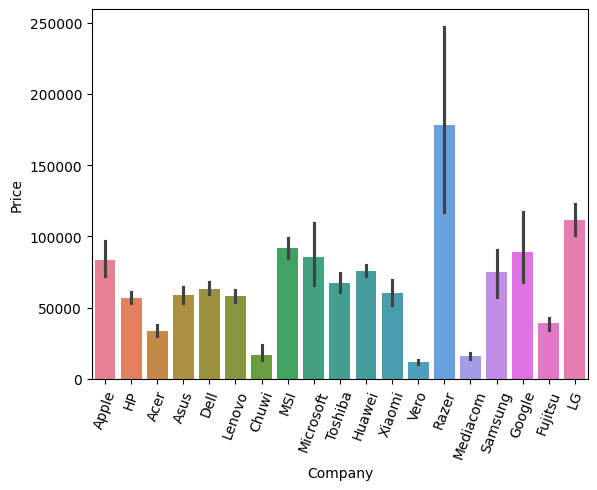

In [14]:
# Company vs Price 
sns.barplot(x='Company', y='Price',data=laptop, palette='husl')
plt.xticks(rotation = 70)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, '2 in 1 Convertible'),
  Text(4, 0, 'Workstation'),
  Text(5, 0, 'Netbook')])

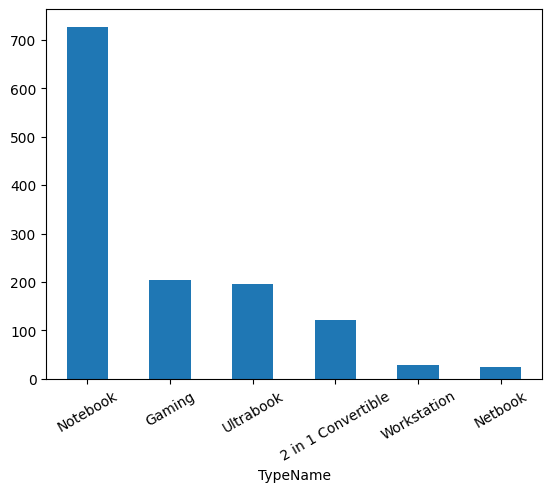

In [15]:
laptop['TypeName'].value_counts().plot(kind='bar')
plt.xticks(rotation = 30  )

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\1998362253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TypeName', y='Price',data=laptop, palette='Paired', errorbar=None )


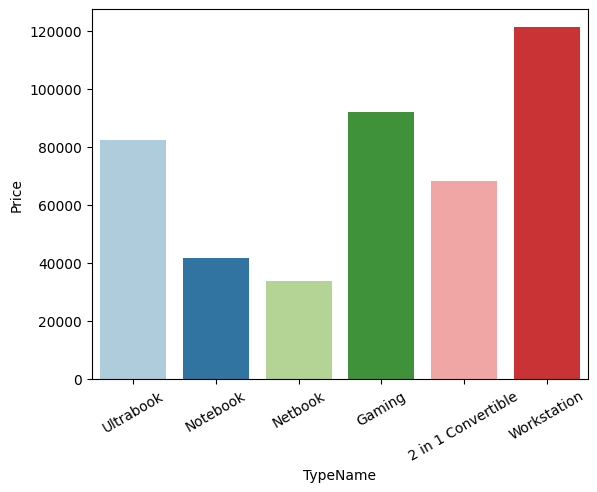

In [16]:
# TypeName vs Price 
sns.barplot(x='TypeName', y='Price',data=laptop, palette='Paired', errorbar=None )
plt.xticks(rotation = 30)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

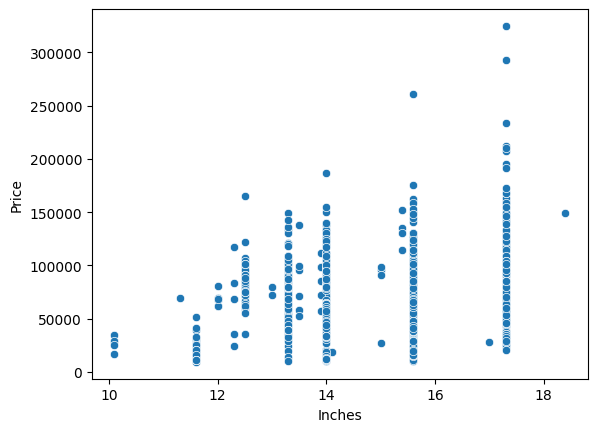

In [17]:
# Does the price vary depending on the size of the laptop in inches?
sns.scatterplot(x=laptop['Inches'],y=laptop['Price']) 

* ### Feature Engineering 

In [18]:
laptop['Touchscreen'] = laptop['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0 )

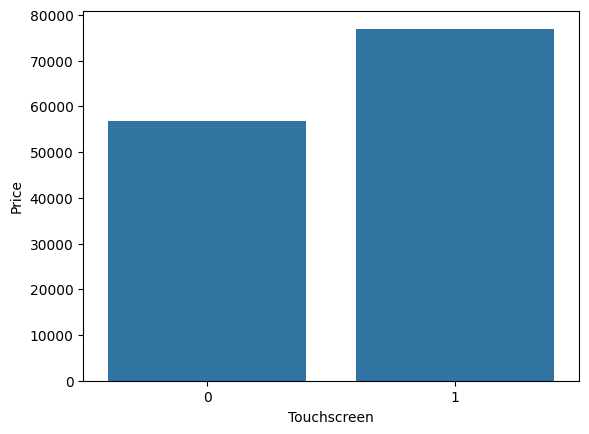

In [19]:
sns.barplot(x='Touchscreen', y='Price',data=laptop, errorbar=None )
plt.show()

In [20]:
laptop['IPS'] = laptop['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0 )

In [21]:
laptop

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0


In [22]:
def findXresolution(s): 
  return s.split()[-1].split("x")[0] 
def findYresolution(s): 
  return s.split()[-1].split("x")[1] 
    
#finding the x_res and y_res from screen resolution 
laptop['X_res'] = laptop['ScreenResolution'].apply(lambda x: findXresolution(x)) 
laptop['Y_res'] = laptop['ScreenResolution'].apply(lambda y: findYresolution(y)) 

#convert to numeric 
laptop['X_res'] = laptop['X_res'].astype('int') 
laptop['Y_res'] = laptop['Y_res'].astype('int') 

In [23]:
laptop.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,1366,768
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0,0,1366,768


In [24]:
print(laptop['TypeName'].unique())

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


In [25]:
laptop['ppi'] = ((((laptop['X_res']**2) + (laptop['Y_res']**2))**0.5)/laptop['Inches']).astype('float')

  
# Relying solely on width (X_res) and height (Y_res) doesn't give the full picture. For example, a 13-inch monitor and a 27-inch monitor both have a resolution of 1920x1080.

# The image on the 13-inch monitor will be sharper and clearer because the pixels are compressed into a smaller area.

# The ppi index combines three variables (X_res, Y_res, inches) into a single number that better expresses the "sharpness" of the monitor.


In [26]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [27]:
laptop.select_dtypes(include=np.number).corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [28]:
#drop unneeded columns
laptop.drop(columns= ['Inches','ScreenResolution', 'X_res', 'Y_res'], inplace=True)

In [29]:
laptop.select_dtypes(include=np.number).corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
ppi            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Name: Price, dtype: float64

In [30]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is 
def fetch_processor(x): 
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3': 
    return cpu_name 
  elif cpu_name.split()[0] == 'Intel': 
    return 'Other Intel Processor' 
  else: 
    return 'AMD Processor'
laptop['Cpu_brand'] = laptop['Cpu'].apply(lambda x: fetch_processor(x)) 

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\2795023928.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=laptop['Cpu_brand'],y=laptop['Price'], palette='tab10')


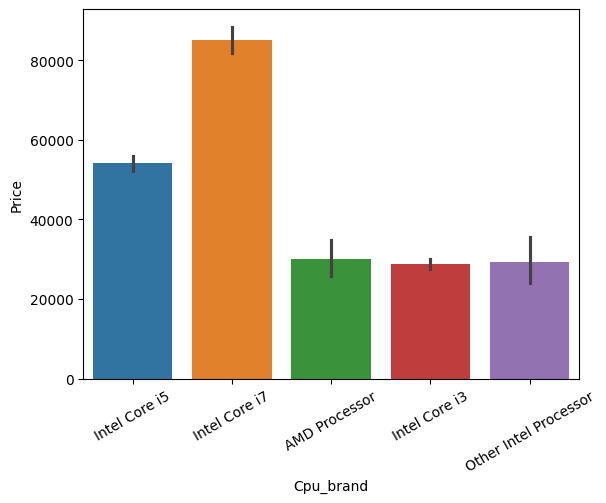

In [31]:
sns.barplot(x=laptop['Cpu_brand'],y=laptop['Price'], palette='tab10') 
plt.xticks(rotation=30 ) 
plt.show() 

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\2963732544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= laptop['Ram'], y= laptop['Price'], palette='tab10')


<Axes: xlabel='Ram', ylabel='Price'>

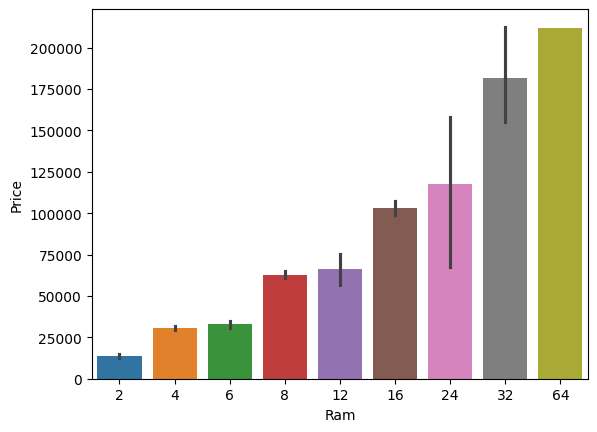

In [32]:
sns.barplot(x= laptop['Ram'], y= laptop['Price'], palette='tab10')

In [33]:
laptop['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [34]:
# الخطوة الأولى: الحصول على مصفوفة بالقيم الفريدة
unique_values = laptop["Memory"].unique()
print(unique_values) 

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


In [35]:
#laptop['Memory'] = laptop['Memory'].astype(str).replace('.0', '', regex=True) 
laptop["Memory"] = laptop["Memory"].str.replace('GB', '') 
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000') 
new = laptop["Memory"].str.split("+", n = 1, expand = True) 

In [36]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [37]:
laptop["first"]= new[0] 
laptop

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,first
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64 Flash Storage
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD


In [38]:
laptop["first"]=laptop["first"].str.strip() 
laptop

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,first
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64 Flash Storage
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD


In [39]:
laptop['second'] = new[1]
laptop

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,first,second
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD,None
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD,None
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64 Flash Storage,None
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD,None


In [40]:
unique_values1 = laptop["first"].unique()
print(unique_values1)

print()

unique_values2 = laptop["second"].unique()
print(unique_values2)

['128 SSD' '128 Flash Storage' '256 SSD' '512 SSD' '500 HDD'
 '256 Flash Storage' '1000 HDD' '32 Flash Storage' '64 Flash Storage'
 '32 SSD' '2000 HDD' '64 SSD' '1.0000 Hybrid' '1000 SSD' '16 SSD'
 '16 Flash Storage' '180 SSD' '32 HDD' '512 Flash Storage' '128 HDD'
 '240 SSD' '8 SSD' '508 Hybrid' '1.0000 HDD']

[None '  1000 HDD' '  256 SSD' '  2000 HDD' '  500 HDD' '  512 SSD'
 '  1.0000 Hybrid']


In [41]:
laptop["Layer1HDD"] = laptop["first"].apply(lambda x:1 if "HDD" in x else 0) 
laptop["Layer1SSD"] = laptop["first"].apply(lambda x:1 if "SSD" in x else 0) 
laptop["Layer1Flash_Storge"] = laptop["first"].apply(lambda x:1 if "Flash Storage" in x else 0 )
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x:1 if "Hybrid" in x else 0)

#The following code will delete any part not a number
laptop['first'] = laptop['first'].str.replace(r'\D', '', regex=True)
laptop

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,first,second,Layer1HDD,Layer1SSD,Layer1Flash_Storge,Layer1Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,None,0,1,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,None,0,0,1,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,None,0,1,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,None,0,1,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,None,0,1,0,0
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,None,0,1,0,0
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64,None,0,0,1,0
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,None,1,0,0,0


In [42]:
laptop['second'].fillna("0", inplace=True)
laptop['Layer2HDD'] = laptop['second'].apply(lambda x:1 if "HDD" in x else 0)
laptop['Layer2SSD'] = laptop['second'].apply(lambda x:1 if "SSD" in x else 0)
laptop['Layer2Hybrid'] = laptop['second'].apply(lambda x:1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storge"] = laptop["second"].apply(lambda x:1 if "Flash Storage" in x else 0 )

#The following code will delete any part not a number
laptop['second'] = laptop['second'].str.replace(r'\D', '', regex=True)
laptop

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\4047163774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laptop['second'].fillna("0", inplace=True)


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,second,Layer1HDD,Layer1SSD,Layer1Flash_Storge,Layer1Hybrid,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storge
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,...,128,0,0,1,0,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,...,512,0,0,1,0,0,0,0,0,0
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,...,64,0,0,0,1,0,0,0,0,0
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,...,1000,0,1,0,0,0,0,0,0,0


In [43]:
second = laptop['second'].unique()
print(second)

['0' '1000' '256' '2000' '500' '512' '10000']


In [44]:
print(laptop["first"].dtype)
print(laptop["second"].dtype)

object
object


In [45]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Cpu                 1303 non-null   object 
 3   Ram                 1303 non-null   int32  
 4   Memory              1303 non-null   object 
 5   Gpu                 1303 non-null   object 
 6   OpSys               1303 non-null   object 
 7   Weight              1303 non-null   float64
 8   Price               1303 non-null   float64
 9   Touchscreen         1303 non-null   int64  
 10  IPS                 1303 non-null   int64  
 11  ppi                 1303 non-null   float64
 12  Cpu_brand           1303 non-null   object 
 13  first               1303 non-null   object 
 14  second              1303 non-null   object 
 15  Layer1HDD           1303 non-null   int64  
 16  Layer1

In [46]:
#convert to numerical 
laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

#finalize the columns by keeping value 
laptop["HDD"] = (laptop["first"]*laptop["Layer1HDD"]+laptop["second"]*laptop["Layer2HDD"] )
laptop["SSD"] = (laptop["first"]*laptop["Layer1SSD"]+laptop["second"]*laptop["Layer2SSD"] )
laptop["Hybrid"] = (laptop["first"]*laptop["Layer1Hybrid"]+laptop["second"]*laptop["Layer2Hybrid"] )
laptop["Flash_Storge"] = (laptop["first"]*laptop["Layer1Flash_Storge"]+laptop["second"]*laptop["Layer2Flash_Storge"] )

In [47]:
# Drop unneeded columns
laptop.drop(columns =['first','second',
            'Layer1HDD','Layer1SSD','Layer1HDD','Layer1Flash_Storge','Layer1Hybrid', 
            'Layer2HDD','Layer2SSD','Layer2HDD','Layer2Flash_Storge','Layer2Hybrid'],inplace=True)

In [48]:
laptop.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storge
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0


In [49]:
print(laptop['Gpu'].unique())

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Intel HD Graphics 400'
 'Nvidia GeForce GTX 1050' 'AMD Radeon R2' 'AMD Radeon 530'
 'Nvidia GeForce 930MX' 'Intel HD Graphics' 'Intel HD Graphics 500'
 'Nvidia GeForce 930MX ' 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Nvidia GeForce MX130' 'AMD R4 Graphics'
 'Nvidia GeForce GTX 940MX' 'AMD Radeon RX 560' 'Nvidia GeForce 920M'
 'AMD Radeon R7 M445' 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M'
 'Intel HD Graphics 515' 'AMD Radeon R5 M420' 'Intel HD Graphic

In [50]:
gpu_counts = laptop['Gpu'].value_counts()
print(gpu_counts)

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64


In [51]:
# which brand GPU is in the laptop 
laptop['Gpu_brand'] = laptop['Gpu'].apply(lambda x:x.split() [0])

# there is one row of ARM GPU so remove it
laptop = laptop[laptop['Gpu_brand'] != 'ARM' ]

In [52]:
laptop

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storge,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64,Intel
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD


In [53]:
laptop.select_dtypes(include=np.number).corr()['Price'].sort_values(ascending=False)

Price           1.000000
Ram             0.742905
SSD             0.670660
ppi             0.475368
IPS             0.253320
Weight          0.209867
Touchscreen     0.192917
Hybrid          0.008702
Flash_Storge   -0.040067
HDD            -0.094106
Name: Price, dtype: float64

In [54]:
#remove unneeded columns 
laptop.drop(columns=['Cpu','Memory','Hybrid','Flash_Storge','Gpu'],inplace = True)

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\4011163451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['Cpu','Memory','Hybrid','Flash_Storge','Gpu'],inplace = True)


In [55]:
laptop

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [56]:
laptop['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [57]:
#Get which OP sys 
def cat_os(inp): 
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10': 
        return 'Windows' 
    elif inp == 'macOS' or inp == 'Mac OS X': 
        return 'Mac' 
    else: 
        return 'Others/No OS/Linux' 
laptop['os'] = laptop['OpSys'].apply(cat_os)

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\1720300342.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop['os'] = laptop['OpSys'].apply(cat_os)


In [58]:
laptop.drop(columns=['OpSys'],inplace=True)

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\3983052306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['OpSys'],inplace=True)


C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\2189953922.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= laptop['os'], y= laptop['Price'], palette='tab10')


([0, 1, 2],
 [Text(0, 0, 'Mac'), Text(1, 0, 'Others/No OS/Linux'), Text(2, 0, 'Windows')])

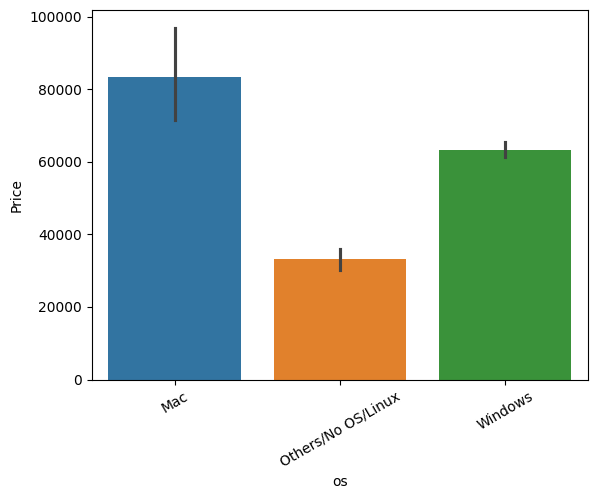

In [59]:
sns.barplot(x= laptop['os'], y= laptop['Price'], palette='tab10')
plt.xticks(rotation = 30)

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\3984844542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop['Price']))


<Axes: xlabel='Price', ylabel='Density'>

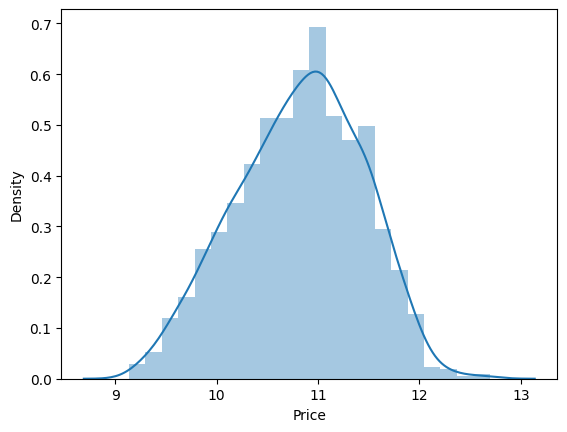

In [60]:
sns.distplot(np.log(laptop['Price']))

* ### Modeling 

In [61]:
laptop.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
IPS            0
ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
os             0
dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'os']
for col in categorical_cols:
    laptop[col] = le.fit_transform(laptop[col])

C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\4278463802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop[col] = le.fit_transform(laptop[col])
C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\4278463802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop[col] = le.fit_transform(laptop[col])
C:\Users\bhbt\AppData\Local\Temp\ipykernel_36736\4278463802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [63]:
# split data and scale numerical features 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = laptop.drop('Price', axis=1)
y = laptop['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 

*#Linear Regression*  


In [65]:
lr = LinearRegression() 
#tarin 
lr.fit(X_train_scaled, y_train) 
#predict 
y_pred_lr = lr.predict(X_test_scaled)

#Validation
R2_lr = r2_score(y_test, y_pred_lr) 
MAE_lr = mean_absolute_error(y_test, y_pred_lr)
RMSE_lr = np.sqrt(mean_absolute_error(y_test, y_pred_lr))

#Cross Validation -> R2 
CrossV_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring= 'r2')
CrossV_lr_mean= CrossV_lr.mean()
CrossV_lr_std= CrossV_lr.std()

*#KNN*

In [66]:
knn = KNeighborsRegressor() 
#tarin 
knn.fit(X_train_scaled, y_train) 
#predict 
y_pred_knn = knn.predict(X_test_scaled)

#Validation
R2_knn = r2_score(y_test, y_pred_knn) 
MAE_knn = mean_absolute_error(y_test, y_pred_knn)
RMSE_knn = np.sqrt(mean_absolute_error(y_test, y_pred_knn))

#Cross Validation -> R2 
CrossV_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring= 'r2')
CrossV_knn_mean= CrossV_knn.mean()
CrossV_knn_std= CrossV_knn.std()

*#SVM*

In [67]:
svm = SVR()
#tarin 
svm.fit(X_train_scaled, y_train) 
#predict 
y_pred_svm = svm.predict(X_test_scaled)

#Validation
R2_svm = r2_score(y_test, y_pred_knn) 
MAE_svm = mean_absolute_error(y_test, y_pred_svm)
RMSE_svm = np.sqrt(mean_absolute_error(y_test, y_pred_svm))

#Cross Validation -> R2 
CrossV_svm = cross_val_score(svm, X_train_scaled, y_train, cv=5, scoring= 'r2')
CrossV_svm_mean= CrossV_svm.mean()
CrossV_svm_std= CrossV_svm.std()

*#DecisionTree*

In [68]:
dt = DecisionTreeRegressor(random_state=42)
#tarin 
dt.fit(X_train_scaled, y_train) 
#predict 
y_pred_dt = dt.predict(X_test_scaled)

#Validation
R2_dt = r2_score(y_test, y_pred_dt) 
MAE_dt = mean_absolute_error(y_test, y_pred_dt)
RMSE_dt = np.sqrt(mean_absolute_error(y_test, y_pred_dt))

#Cross Validation -> R2 
CrossV_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring= 'r2')
CrossV_dt_mean= CrossV_dt.mean()
CrossV_dt_std= CrossV_dt.std()

*#Random Forest*

In [69]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
#tarin 
rf.fit(X_train_scaled, y_train) 
#predict 
y_pred_rf = rf.predict(X_test_scaled)

#Validation
R2_rf = r2_score(y_test, y_pred_rf) 
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
RMSE_rf = np.sqrt(mean_absolute_error(y_test, y_pred_rf))

#Cross Validation -> R2 
CrossV_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring= 'r2')
CrossV_rf_mean= CrossV_rf.mean()
CrossV_rf_std= CrossV_rf.std()

*Validation the models*

In [70]:
results_list = [
    
       
    {
        'Model': 'Linear Regression',
        'R2 Score': R2_lr,
        'MAE': MAE_lr,
        'RMSE': RMSE_lr,
        'Cross Validation Mean R2': CrossV_lr_mean,
        'Cross Validation Std R2': CrossV_lr_std
    },
    {
        'Model': 'K-Nearest Neighbors',
        'R2 Score': R2_knn,
        'MAE': MAE_knn,
        'RMSE': RMSE_knn,
        'Cross Validation Mean R2': CrossV_knn_mean,
        'Cross Validation Std R2': CrossV_knn_std
    },
    {
        'Model': 'Support Vector Machine',
        'R2 Score': R2_svm,
        'MAE': MAE_svm,
        'RMSE': RMSE_svm,
        'Cross Validation Mean R2': CrossV_svm_mean,
        'Cross Validation Std R2': CrossV_svm_std
    },
    {
        'Model': 'Decision Tree',
        'R2 Score': R2_dt,
        'MAE': MAE_dt,
        'RMSE': RMSE_dt,
        'Cross Validation Mean R2': CrossV_dt_mean,
        'Cross Validation Std R2': CrossV_dt_std
    }, 
     {'Model': 'Random Forest',
        'R2 Score': R2_rf,
        'MAE': MAE_rf,
        'RMSE': RMSE_rf,
        'Cross Validation Mean R2': CrossV_rf_mean,
        'Cross Validation Std R2': CrossV_rf_std
    }
]

# تحويل القائمة إلى DataFrame
results_df = pd.DataFrame(results_list)

results_df

,Model,R2 Score,MAE,RMSE,Cross Validation Mean R2,Cross Validation Std R2
0,Linear Regression,0.685722,16138.062653,127.035675,0.675990,0.028403
1,K-Nearest Neighbors,0.742695,11961.702135,109.369567,0.726750,0.034924
2,Support Vector Machine,0.742695,27140.414682,164.743481,-0.049082,0.033004
3,Decision Tree,0.753615,11988.121802,109.490282,0.636817,0.059248
4,Random Forest,0.823413,10139.518575,100.695177,0.781933,0.039273


In [71]:
import joblib

# Save the best model
joblib.dump(rf, 'laptop_random_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'laptop_scaler.pkl')


['laptop_scaler.pkl']

In [72]:
import pkg_resources

installed_packages = pkg_resources.working_set
with open('requirements.txt', 'w') as f:
    for package in installed_packages:
        f.write(f"{package.key}=={package.version}\n")

print("تم إنشاء ملف requirements.txt مع المكتبات المثبتة والإصدارات.")

تم إنشاء ملف requirements.txt مع المكتبات المثبتة والإصدارات.


In [73]:
#import sklearn
#print(sklearn.__version__)


NameError: name 'sklearn' is not defined